<a href="https://colab.research.google.com/github/Sarayu-123/-FUTURE_ML_02-/blob/main/TASK_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded =files.upload()

Saving archive (1).zip to archive (1).zip


In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv("archive (1).zip")

# Drop unnecessary columns
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

# Encode categorical columns
le = LabelEncoder()
for col in ['Geography', 'Gender']:
    df[col] = le.fit_transform(df[col])

# Check target column
print("Target column distribution:\n", df['Exited'].value_counts())


Target column distribution:
 Exited
0    7963
1    2037
Name: count, dtype: int64


In [4]:
from sklearn.model_selection import train_test_split

# Features and target
X = df.drop(columns=['Exited'])
y = df['Exited']

# Train/Test split with stratification to preserve class distribution
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Check class distribution in splits
print("Training target distribution:\n", y_train.value_counts())
print("Testing target distribution:\n", y_test.value_counts())


Training target distribution:
 Exited
0    6370
1    1630
Name: count, dtype: int64
Testing target distribution:
 Exited
0    1593
1     407
Name: count, dtype: int64


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Features and target
X = df.drop(columns=['Exited'])
y = df['Exited']

# Train/Test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Scale numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Step 5 completed: Data split and scaled.")


Step 5 completed: Data split and scaled.


In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Scale numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train Logistic Regression
model = LogisticRegression(max_iter=2000, random_state=42)  # increase iterations
model.fit(X_train_scaled, y_train)

print("Step 6 completed: Logistic Regression trained successfully!")


Step 6 completed: Logistic Regression trained successfully!


In [7]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# Predict on test set
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]  # probability of churn

# Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))


Accuracy: 0.805
Confusion Matrix:
 [[1552   41]
 [ 349   58]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.97      0.89      1593
           1       0.59      0.14      0.23       407

    accuracy                           0.81      2000
   macro avg       0.70      0.56      0.56      2000
weighted avg       0.77      0.81      0.75      2000

ROC-AUC Score: 0.771043771043771


           Feature  Importance
3              Age    0.739402
8   IsActiveMember    0.519640
5          Balance    0.314425
2           Gender    0.267057
0      CreditScore    0.086363
1        Geography    0.075674
9  EstimatedSalary    0.049505
6    NumOfProducts    0.031104
7        HasCrCard    0.025533
4           Tenure    0.017044


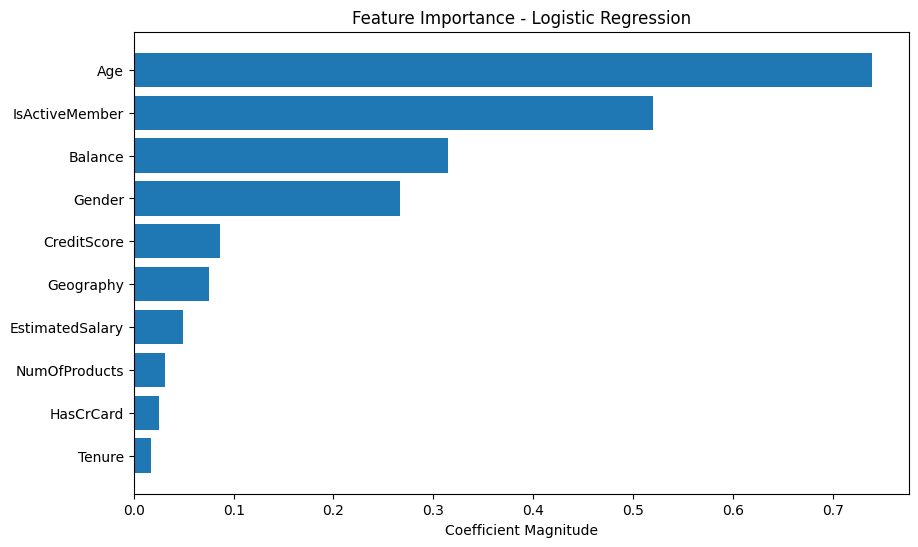

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Get feature importance from coefficients
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': np.abs(model.coef_[0])  # absolute value of coefficients
}).sort_values(by='Importance', ascending=False)

# Display the feature importance table
print(feature_importance)

# Plot feature importance
plt.figure(figsize=(10,6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel("Coefficient Magnitude")
plt.title("Feature Importance - Logistic Regression")
plt.gca().invert_yaxis()  # highest importance on top
plt.show()


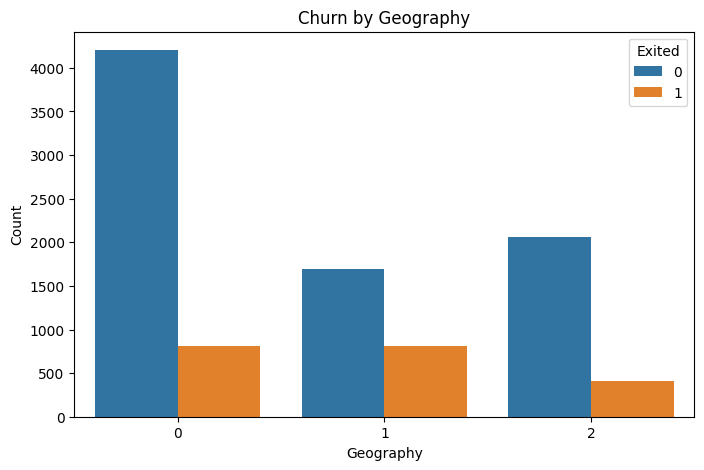

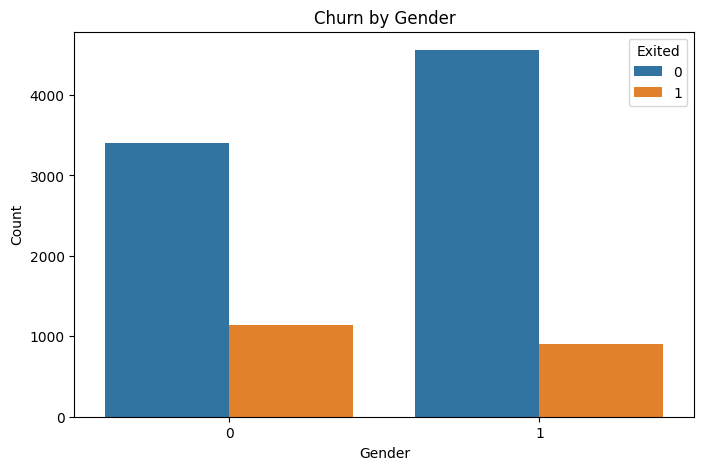

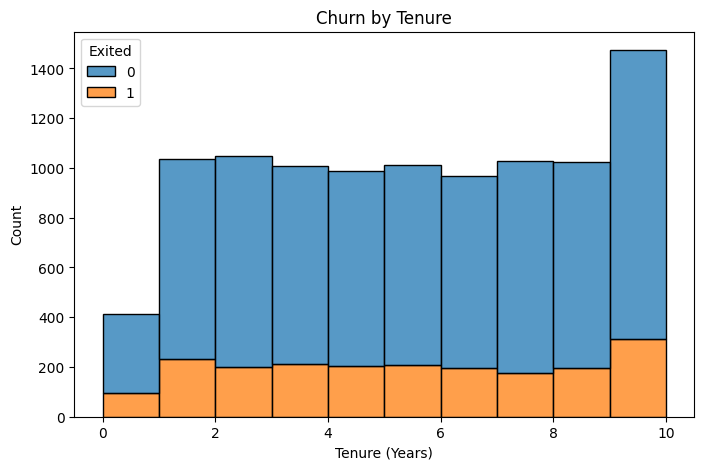

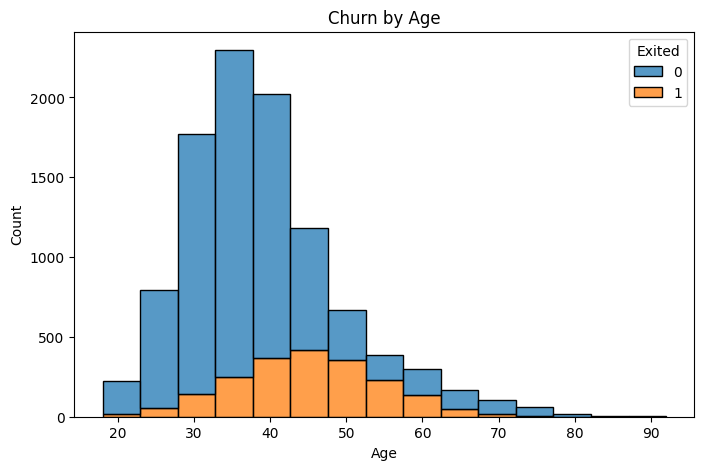

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Churn by Geography
plt.figure(figsize=(8,5))
sns.countplot(x='Geography', hue='Exited', data=df)
plt.title("Churn by Geography")
plt.xlabel("Geography")
plt.ylabel("Count")
plt.show()

# Churn by Gender
plt.figure(figsize=(8,5))
sns.countplot(x='Gender', hue='Exited', data=df)
plt.title("Churn by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

# Churn by Tenure (example: histogram)
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='Tenure', hue='Exited', multiple='stack', bins=10)
plt.title("Churn by Tenure")
plt.xlabel("Tenure (Years)")
plt.ylabel("Count")
plt.show()

# Optional: Churn by Age
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='Age', hue='Exited', multiple='stack', bins=15)
plt.title("Churn by Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()
